In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

outputs = sorted(os.listdir("./validation_output"))[1:]

table = pd.DataFrame(columns=["Model", "PSNR", "SSIM", "Skip_Count"])
table["Model"] = outputs

for output in outputs:
    print(output)

    # Paths to folders
    generated_folder = f"./validation_output/{output}"  # Folder with colorized images
    original_folder = "./validation_output/true"  # Folder with ground truth images

    # Get sorted lists of image filenames
    if '.DS_Store' in generated_images:
        os.remove(os.path.join(generated_folder, '.DS_Store'))
    generated_images = sorted(os.listdir(generated_folder))
    original_images = sorted(os.listdir(original_folder))
    print(generated_images)
    # Ensure both folders have the same number of images
    assert len(generated_images) == len(original_images), "Mismatch in number of images"

    # Initialize lists to store PSNR and SSIM values
    psnr_values = []
    ssim_values = []
    skip = 0

    # Iterate through images
    for gen_img_name, orig_img_name in zip(generated_images, original_images):
        # Construct full paths
        gen_img_path = os.path.join(generated_folder, gen_img_name)
        orig_img_path = os.path.join(original_folder, orig_img_name)

        # Read images
        gen_img = cv2.imread(gen_img_path)  # Read generated image
        orig_img = cv2.imread(orig_img_path)  # Read original image

        # Convert images to grayscale (if needed) or keep them in RGB
        if np.all(gen_img == 0):
            skip += 1
            continue

        # Ensure images are the same size
        if gen_img.shape != orig_img.shape:
            gen_img = cv2.resize(gen_img, (orig_img.shape[1], orig_img.shape[0]))

        # Convert images to float for calculations
        gen_img = gen_img.astype(np.float32)
        orig_img = orig_img.astype(np.float32)

        # Compute MSE for PSNR
        mse = np.mean((gen_img - orig_img) ** 2)
        psnr = 10 * np.log10((255 ** 2) / mse) if mse != 0 else float("inf")

        # Compute SSIM
        ssim_value = ssim(orig_img, gen_img, gaussian_weights=True, multichannel=True, data_range=255)

        # Store values
        psnr_values.append(psnr)
        ssim_values.append(ssim_value)

    # Compute averages
    mean_psnr = np.mean(psnr_values)
    mean_ssim = np.mean(ssim_values)

    # Compute sd 
    sd_psnr = np.std(psnr_values)
    sd_ssim = np.std(ssim_values)

    # Store values in table
    table.loc[table["Model"] == output, "PSNR"] = mean_psnr
    table.loc[table["Model"] == output, "SSIM"] = mean_ssim
    table.loc[table["Model"] == output, "PSNR_SD"] = sd_psnr
    table.loc[table["Model"] == output, "SSIM_SD"] = sd_ssim
    table.loc[table["Model"] == output, "Skip_Count"] = skip


0church_50k_18750
['000001.png', '000002.png', '000003.png', '000004.png', '000005.png', '000006.png', '000007.png', '000008.png', '000009.png', '000010.png', '000011.png', '000012.png', '000013.png', '000014.png', '000015.png', '000016.png', '000017.png', '000018.png', '000019.png', '000020.png', '000021.png', '000022.png', '000023.png', '000024.png', '000025.png', '000026.png', '000027.png', '000028.png', '000029.png', '000030.png', '000031.png', '000032.png', '000033.png', '000034.png', '000035.png', '000036.png', '000037.png', '000038.png', '000039.png', '000040.png', '000041.png', '000042.png', '000043.png', '000044.png', '000045.png', '000046.png', '000047.png', '000048.png', '000049.png', '000050.png', '000051.png', '000052.png', '000053.png', '000054.png', '000055.png', '000056.png', '000057.png', '000058.png', '000059.png', '000060.png', '000061.png', '000062.png', '000063.png', '000064.png', '000065.png', '000066.png', '000067.png', '000068.png', '000069.png', '000070.png', '

/Users/tatsutoyamamoto/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [ ]:
import seaborn as sns

,Model,PSNR,SSIM,Skip_Count,PSNR_SD,SSIM_SD
0,0church_50k_18750,13.628292,0.474648,2,2.455141,0.114713
1,100church_100k_18750,13.688633,0.476095,1,1.788291,0.119006
2,100church_10k_18750,12.474712,0.436538,1,1.499534,0.108604
3,100church_25k_18750,16.640577,0.559209,0,2.562064,0.117823
4,100church_50k_10000,11.616747,0.379173,0,1.502565,0.118770
5,100church_50k_18750,17.637289,0.55475,1,2.604284,0.123790
6,100church_50k_25000,18.63588,0.612664,0,2.457320,0.101018
7,100church_50k_5000,11.015495,0.344893,0,1.364939,0.105349
8,100church_50k_50000,18.858815,0.66149,2,2.283808,0.092580
9,25church_50k_18750,9.51524,0.304171,3,1.370569,0.104353


                  Model       PSNR      SSIM Skip_Count   PSNR_SD   SSIM_SD
0     0church_50k_18750  13.628292  0.474648          2  2.455141  0.114713
5   100church_50k_18750  17.637289   0.55475          1  2.604284  0.123790
9    25church_50k_18750    9.51524  0.304171          3  1.370569  0.104353
10   50church_50k_18750  16.440173  0.536661          0  2.306468  0.116019
11   75church_50k_18750   17.47434  0.571854          0  2.598730  0.116799


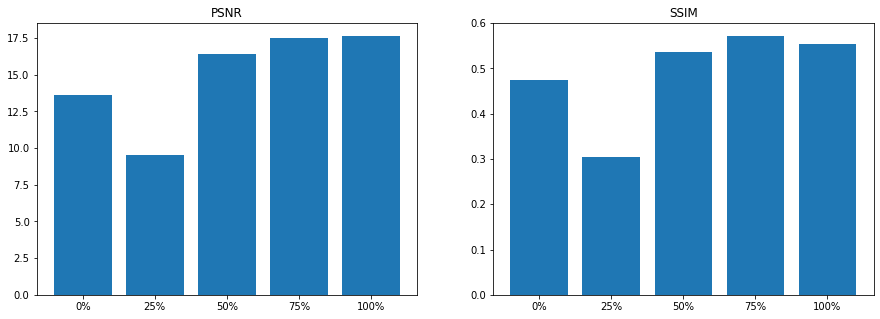

In [7]:
hyp1 = table.loc[table["Model"].isin(["0church_50k_18750", "25church_50k_18750", "50church_50k_18750", "75church_50k_18750", "100church_50k_18750"])]
print(hyp1)
hyp1 = hyp1.iloc[[0,2,3,4,1]].reset_index(drop=True)
# print(hyp1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(["0%", "25%", "50%", "75%", "100%"], hyp1["PSNR"], label="PSNR")
axs[0].set_title("PSNR")

axs[1].bar(["0%", "25%", "50%", "75%", "100%"], hyp1["SSIM"], label="SSIM")
axs[1].set_title("SSIM")
plt.show()

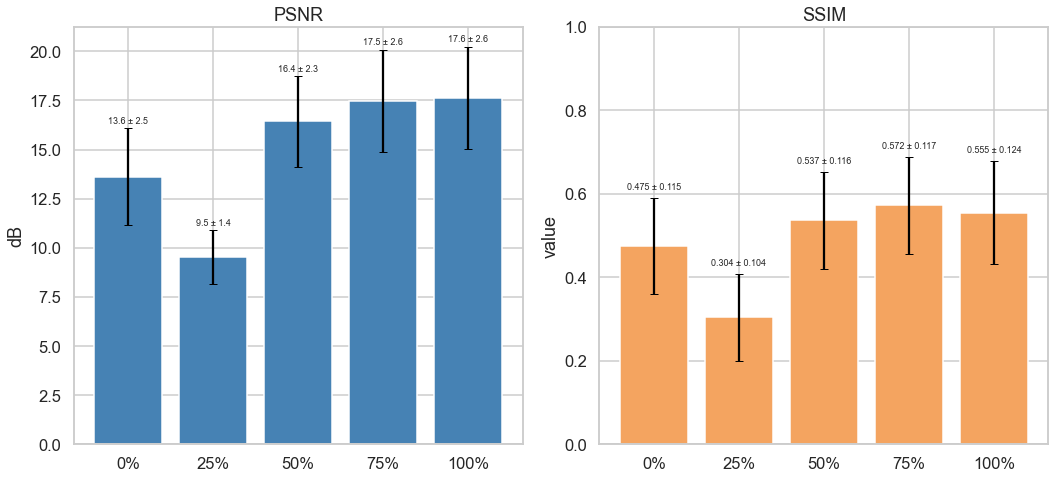

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------------------------------------------------
# 1.  Select and re-order the rows you want to visualise
# ----------------------------------------------------------------------
wanted = [
    "0church_50k_18750",
    "25church_50k_18750",
    "50church_50k_18750",
    "75church_50k_18750",
    "100church_50k_18750",
]

hyp1 = table.loc[table["Model"].isin(wanted)]
hyp1 = hyp1.iloc[[0, 2, 3, 4, 1]].reset_index(drop=True)

# ----------------------------------------------------------------------
# 2.  Get means and (already-computed) standard deviations
#     – If you don’t yet have the *_std columns, compute them beforehand.
# ----------------------------------------------------------------------
x_labels   = ["0%", "25%", "50%", "75%", "100%"]
psnr_mean  = hyp1["PSNR"].values
psnr_std   = hyp1["PSNR_SD"].values      # <- 1-σ over the test images
ssim_mean  = hyp1["SSIM"].values
ssim_std   = hyp1["SSIM_SD"].values

# ----------------------------------------------------------------------
# 3.  Plot
# ----------------------------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharex=True)

# ----- PSNR -----------------------------------------------------------
axs[0].bar(
    x_labels, psnr_mean, yerr=psnr_std,
    capsize=4, color="steelblue"
)
axs[0].set_title("PSNR")
axs[0].set_ylabel("dB")

# annotate “mean ± SD” above each bar
offset_psnr = 0.15   # small gap so text clears the error bar
for x, m, s in zip(x_labels, psnr_mean, psnr_std):
    axs[0].text(x, m + s + offset_psnr, f"{m:.1f} ± {s:.1f}",
                ha="center", va="bottom", fontsize=9)

# ----- SSIM -----------------------------------------------------------
axs[1].bar(
    x_labels, ssim_mean, yerr=ssim_std,
    capsize=4, color="sandybrown"
)
axs[1].set_title("SSIM")
axs[1].set_ylabel("value")
axs[1].set_ylim(0, 1)              # SSIM is within [0, 1]

offset_ssim = 0.015
for x, m, s in zip(x_labels, ssim_mean, ssim_std):
    axs[1].text(x, m + s + offset_ssim, f"{m:.3f} ± {s:.3f}",
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'SSIM')

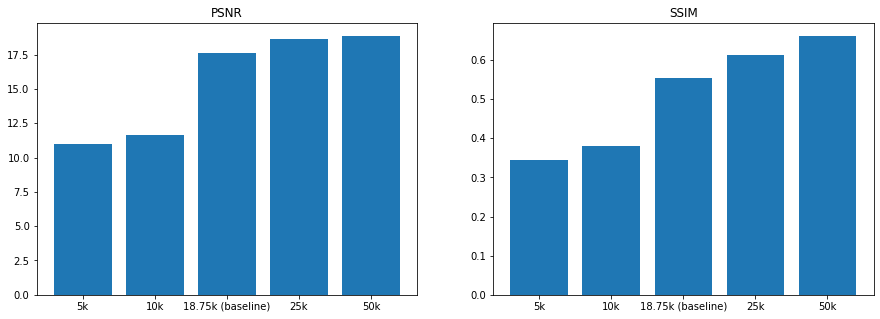

In [ ]:
hyp2 = table.loc[table["Model"].isin(["100church_50k_5000", "100church_50k_10000", "100church_50k_18750", "100church_50k_25000", "100church_50k_50000"])]
# print(hyp2)
hyp2 = hyp2.iloc[[3,0,1,2,4]].reset_index(drop=True)
# print(hyp2)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(["5k", "10k", "18.75k (baseline)", "25k", "50k"], hyp2["PSNR"], label="PSNR")
axs[0].set_title("PSNR")

axs[1].bar(["5k", "10k", "18.75k (baseline)", "25k", "50k"], hyp2["SSIM"], label="SSIM")
axs[1].set_title("SSIM")



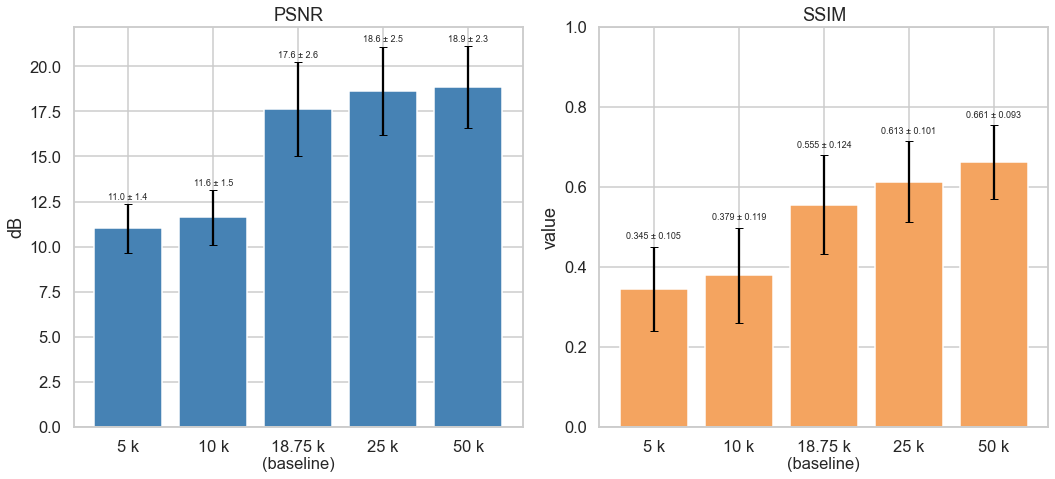

In [20]:
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 1.  Select and order the rows for hypothesis 2
# ----------------------------------------------------------------------
wanted_h2 = [
    "100church_50k_5000",     # 5 k steps
    "100church_50k_10000",    # 10 k
    "100church_50k_18750",    # 18.75 k  (baseline)
    "100church_50k_25000",    # 25 k
    "100church_50k_50000",    # 50 k
]

hyp2 = table.loc[table["Model"].isin(wanted_h2)]
hyp2 = hyp2.iloc[[3, 0, 1, 2, 4]].reset_index(drop=True)

# ----------------------------------------------------------------------
# 2.  Pull means and SDs
# ----------------------------------------------------------------------
x_labels   = ["5 k", "10 k", "18.75 k\n(baseline)", "25 k", "50 k"]
psnr_mean  = hyp2["PSNR"].values
psnr_std   = hyp2["PSNR_SD"].values
ssim_mean  = hyp2["SSIM"].values
ssim_std   = hyp2["SSIM_SD"].values

# ----------------------------------------------------------------------
# 3.  Plot
# ----------------------------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharex=True)

# -- PSNR --------------------------------------------------------------
axs[0].bar(
    x_labels, psnr_mean, yerr=psnr_std,
    capsize=4, color="steelblue"
)
axs[0].set_title("PSNR")
axs[0].set_ylabel("dB")

offset_psnr = 0.15
for x, m, s in zip(x_labels, psnr_mean, psnr_std):
    axs[0].text(x, m + s + offset_psnr, f"{m:.1f} ± {s:.1f}",
                ha="center", va="bottom", fontsize=9)

# -- SSIM --------------------------------------------------------------
axs[1].bar(
    x_labels, ssim_mean, yerr=ssim_std,
    capsize=4, color="sandybrown"
)
axs[1].set_title("SSIM")
axs[1].set_ylabel("value")
axs[1].set_ylim(0, 1)

offset_ssim = 0.015
for x, m, s in zip(x_labels, ssim_mean, ssim_std):
    axs[1].text(x, m + s + offset_ssim, f"{m:.3f} ± {s:.3f}",
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


In [46]:
table2

,Model,PSNR,SSIM,Skip_Count,PSNR_SD,SSIM_SD
0,0church_50k_18750,10.726101,0.318433,6,1.551881,0.099139
1,100church_100k_18750,18.416003,0.589858,1,2.605372,0.109019
2,100church_10k_18750,14.644748,0.469266,0,1.970407,0.115904
3,100church_25k_18750,18.195361,0.564054,0,2.712635,0.109408
4,100church_50k_10000,17.241192,0.533245,1,2.607544,0.113015
5,100church_50k_18750,17.455761,0.552148,0,2.428644,0.106954
6,100church_50k_25000,18.250424,0.602683,1,2.623138,0.108880
7,100church_50k_5000,15.72483,0.531074,0,1.738698,0.110010
8,100church_50k_50000,18.581396,0.651316,1,2.344046,0.097531
9,25church_50k_18750,10.247809,0.315827,4,1.460813,0.106112


                   Model       PSNR      SSIM Skip_Count   PSNR_SD   SSIM_SD
 2   100church_10k_18750  12.474712  0.436538          1  1.499534  0.108604
 3   100church_25k_18750  16.640577  0.559209          0  2.562064  0.117823
 5   100church_50k_18750  17.637289   0.55475          1  2.604284  0.123790
-1  100church_100k_18750  18.416003  0.589858          1  2.605372  0.109019


/Users/tatsutoyamamoto/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Text(0.5, 1.0, 'SSIM')

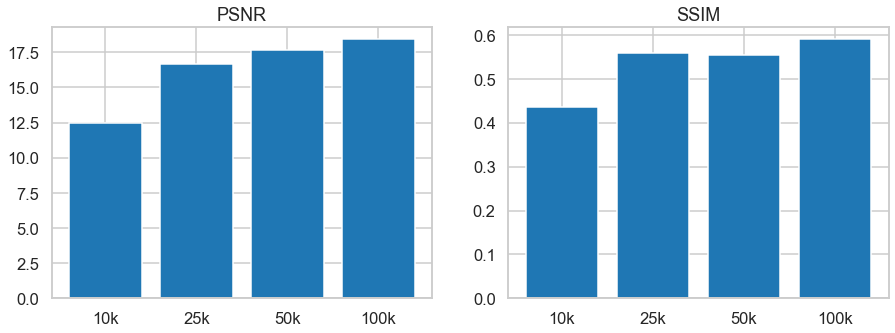

In [51]:
hyp3 = table.loc[table["Model"].isin(["100church_50k_18750", "100church_10k_18750", "100church_25k_18750"])]
hyp3.loc[-1] = table2.loc[table2["Model"] == "100church_100k_18750"].iloc[0]
print(hyp3)
# hyp3 = hyp3.iloc[[1,2,3,0]].reset_index(drop=True)
# print(hyp3)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(["10k", "25k", "50k", "100k"], hyp3["PSNR"], label="PSNR")
axs[0].set_title("PSNR")

axs[1].bar(["10k", "25k", "50k", "100k"], hyp3["SSIM"], label="SSIM")
axs[1].set_title("SSIM")

# repeat the experiments 

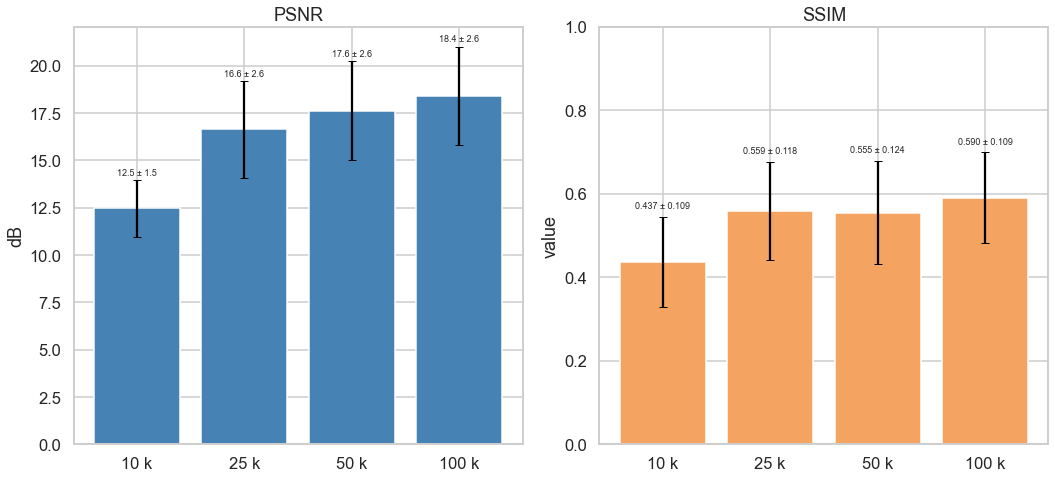

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 1.  Assemble the dataframe for hypothesis 3
# ----------------------------------------------------------------------
hyp3 = table.loc[
    table["Model"].isin([
        "100church_10k_18750",   # 10 k images
        "100church_25k_18750",   # 25 k images
        "100church_50k_18750",   # 50 k images
    ])
]

extra_row = table2.loc[table2["Model"] == "100church_100k_18750"]  # 100 k images

# combine and reset index; concat aligns columns by name
hyp3 = pd.concat([hyp3, extra_row], ignore_index=True)

# reorder to 10 k, 25 k, 50 k, 100 k
order = ["100church_10k_18750", "100church_25k_18750",
         "100church_50k_18750", "100church_100k_18750"]
hyp3["order"] = pd.Categorical(hyp3["Model"], categories=order, ordered=True)
hyp3 = hyp3.sort_values("order").drop(columns="order").reset_index(drop=True)

# ----------------------------------------------------------------------
# 2.  Extract means and standard deviations
# ----------------------------------------------------------------------
x_labels   = ["10 k", "25 k", "50 k", "100 k"]
psnr_mean  = hyp3["PSNR"].values
psnr_std   = hyp3["PSNR_SD"].values
ssim_mean  = hyp3["SSIM"].values
ssim_std   = hyp3["SSIM_SD"].values

# ----------------------------------------------------------------------
# 3.  Plot
# ----------------------------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharex=True)

# -- PSNR --------------------------------------------------------------
axs[0].bar(
    x_labels, psnr_mean, yerr=psnr_std,
    capsize=4, color="steelblue"
)
axs[0].set_title("PSNR")
axs[0].set_ylabel("dB")

offset_psnr = 0.15
for x, m, s in zip(x_labels, psnr_mean, psnr_std):
    axs[0].text(x, m + s + offset_psnr, f"{m:.1f} ± {s:.1f}",
                ha="center", va="bottom", fontsize=9)

# -- SSIM --------------------------------------------------------------
axs[1].bar(
    x_labels, ssim_mean, yerr=ssim_std,
    capsize=4, color="sandybrown"
)
axs[1].set_title("SSIM")
axs[1].set_ylabel("value")
axs[1].set_ylim(0, 1)

offset_ssim = 0.015
for x, m, s in zip(x_labels, ssim_mean, ssim_std):
    axs[1].text(x, m + s + offset_ssim, f"{m:.3f} ± {s:.3f}",
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


In [24]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

outputs = sorted(os.listdir("./validation_output2"))[1:]

table2 = pd.DataFrame(columns=["Model", "PSNR", "SSIM", "Skip_Count"])
table2["Model"] = outputs

for output in outputs:
    print(output)

    # Paths to folders
    generated_folder = f"./validation_output2/{output}"  # Folder with colorized images
    original_folder = "./validation_output2/true"  # Folder with ground truth images

    # Get sorted lists of image filenames
    generated_images = sorted(os.listdir(generated_folder))
    original_images = sorted(os.listdir(original_folder))

    # Ensure both folders have the same number of images
    assert len(generated_images) == len(original_images), "Mismatch in number of images"

    # Initialize lists to store PSNR and SSIM values
    psnr_values = []
    ssim_values = []
    skip = 0

    # Iterate through images
    for gen_img_name, orig_img_name in zip(generated_images, original_images):
        # Construct full paths
        gen_img_path = os.path.join(generated_folder, gen_img_name)
        orig_img_path = os.path.join(original_folder, orig_img_name)

        # Read images
        gen_img = cv2.imread(gen_img_path)  # Read generated image
        orig_img = cv2.imread(orig_img_path)  # Read original image

        # Convert images to grayscale (if needed) or keep them in RGB
        if np.all(gen_img == 0):
            skip += 1
            continue

        # Ensure images are the same size
        if gen_img.shape != orig_img.shape:
            gen_img = cv2.resize(gen_img, (orig_img.shape[1], orig_img.shape[0]))

        # Convert images to float for calculations
        gen_img = gen_img.astype(np.float32)
        orig_img = orig_img.astype(np.float32)

        # Compute MSE for PSNR
        mse = np.mean((gen_img - orig_img) ** 2)
        psnr = 10 * np.log10((255 ** 2) / mse) if mse != 0 else float("inf")

        # Compute SSIM
        ssim_value = ssim(orig_img, gen_img, gaussian_weights=True, multichannel=True, data_range=255)

        # Store values
        psnr_values.append(psnr)
        ssim_values.append(ssim_value)

    # Compute averages
    mean_psnr = np.mean(psnr_values)
    mean_ssim = np.mean(ssim_values)
    # Compute sd
    sd_psnr = np.std(psnr_values)
    sd_ssim = np.std(ssim_values)

    # Store values in table
    table2.loc[table2["Model"] == output, "PSNR"] = mean_psnr
    table2.loc[table2["Model"] == output, "SSIM"] = mean_ssim
    table2.loc[table2["Model"] == output, "PSNR_SD"] = sd_psnr
    table2.loc[table2["Model"] == output, "SSIM_SD"] = sd_ssim
    table2.loc[table2["Model"] == output, "Skip_Count"] = skip


0church_50k_18750
100church_100k_18750
100church_10k_18750
100church_25k_18750
100church_50k_10000
100church_50k_18750
100church_50k_25000
100church_50k_5000
100church_50k_50000
25church_50k_18750
50church_50k_18750
75church_50k_18750
true


/Users/tatsutoyamamoto/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [25]:
table, table2

(                   Model       PSNR      SSIM Skip_Count   PSNR_SD   SSIM_SD
 0      0church_50k_18750  13.628292  0.474648          2  2.455141  0.114713
 1   100church_100k_18750  13.688633  0.476095          1  1.788291  0.119006
 2    100church_10k_18750  12.474712  0.436538          1  1.499534  0.108604
 3    100church_25k_18750  16.640577  0.559209          0  2.562064  0.117823
 4    100church_50k_10000  11.616747  0.379173          0  1.502565  0.118770
 5    100church_50k_18750  17.637289   0.55475          1  2.604284  0.123790
 6    100church_50k_25000   18.63588  0.612664          0  2.457320  0.101018
 7     100church_50k_5000  11.015495  0.344893          0  1.364939  0.105349
 8    100church_50k_50000  18.858815   0.66149          2  2.283808  0.092580
 9     25church_50k_18750    9.51524  0.304171          3  1.370569  0.104353
 10    50church_50k_18750  16.440173  0.536661          0  2.306468  0.116019
 11    75church_50k_18750   17.47434  0.571854          0  2.598

In [26]:
table.merge(table2, on="Model", suffixes=("_1", "_2"), how="outer")

,Model,PSNR_1,SSIM_1,Skip_Count_1,PSNR_SD_1,SSIM_SD_1,PSNR_2,SSIM_2,Skip_Count_2,PSNR_SD_2,SSIM_SD_2
0,0church_50k_18750,13.628292,0.474648,2,2.455141,0.114713,10.726101,0.318433,6,1.551881,0.099139
1,100church_100k_18750,13.688633,0.476095,1,1.788291,0.119006,18.416003,0.589858,1,2.605372,0.109019
2,100church_10k_18750,12.474712,0.436538,1,1.499534,0.108604,14.644748,0.469266,0,1.970407,0.115904
3,100church_25k_18750,16.640577,0.559209,0,2.562064,0.117823,18.195361,0.564054,0,2.712635,0.109408
4,100church_50k_10000,11.616747,0.379173,0,1.502565,0.118770,17.241192,0.533245,1,2.607544,0.113015
5,100church_50k_18750,17.637289,0.55475,1,2.604284,0.123790,17.455761,0.552148,0,2.428644,0.106954
6,100church_50k_25000,18.63588,0.612664,0,2.457320,0.101018,18.250424,0.602683,1,2.623138,0.108880
7,100church_50k_5000,11.015495,0.344893,0,1.364939,0.105349,15.72483,0.531074,0,1.738698,0.110010
8,100church_50k_50000,18.858815,0.66149,2,2.283808,0.092580,18.581396,0.651316,1,2.344046,0.097531
9,25church_50k_18750,9.51524,0.304171,3,1.370569,0.104353,10.247809,0.315827,4,1.460813,0.106112
